# Looking at specific paths:

Let's look more closely at forced paths. Can we even project onto the exact points we want to?

In [1]:
import batch_test_latent_sim as bt
import numpy as np
from matplotlib import pylab as plt
import plotly.offline as py
import plotly.graph_objs as go

In [2]:
import tensorflow as tf

In [9]:
def eval_path_via_inversion(ls, T1,p1, T2,p2):
    states=[]
    ss = np.linspace(0.0,1.0,50)
    for s in ss:
        try:
#             pp=p1*(1.0-(np.exp(s)-1)/(np.e-1) )  + p2*((np.exp(s)-1)/(np.e-1))
            pp = np.exp( np.log(p1)*(1.0-s) + np.log(p2)*s )
            print(pp)
            q0 = ls.find_point(T=T1*(1.0-s)+T2*s, 
                               p=pp,
                              under_relax=0.5)
            state = ls.decode(q0)
            states.append(state)
        except Exception as e:
            print(e)
    return np.vstack(states)
def eval_path_via_latent_space(ls, T1,p1, T2,p2):
    states=[]
    ss = np.linspace(0.0,1.0,50)
    q1 = ls.find_point(T=T1, p=p1)
    q2 = ls.find_point(T=T2, p=p2)
    for s in ss:
        try:
            state = ls.decode(q1*(1.0-s)+q2*s)
            states.append(state)
        except Exception as e:
            print(e)
            
    return np.vstack(states)
def eval_path_on_problem(ls,problem,method='inversion'):
    if method=='inversion':
        states = eval_path_via_inversion(ls, problem.initial['T'],problem.initial['p'],
                          problem.answer['T'],problem.answer['p'])
    else:
        states = eval_path_via_latent_space(ls, problem.initial['T'],problem.initial['p'],
                          problem.answer['T'],problem.answer['p'])
    return ls.model_name,states

def scatter_contour(model_name,states,xidx=1,yidx=2):
#     plt.semilogx(states[:,xidx],states[:,yidx],'+-',label=ls.model_name)
    sc = go.Scatter(x=states[:,xidx],y=states[:,yidx],name=model_name)
    return sc
def plot_contours(states):
    scatters = [scatter_contour(m,s) for m,s in states]
    fig = go.Figure(data=scatters,
              layout=go.Layout(
                    xaxis=dict(
                        type='log',
                        autorange=True
                    ),
                    yaxis=dict(
                        autorange=True
                    )
                ))
    return fig


In [5]:
states = []
nets = [
     'Classifying_1,3,6,12,tanh',
    'Classifying_1,3,6,12,sigmoid',
     'Classifying_1,5,6,12,sigmoid'
]
for n in nets:
    ls = bt.curried_latentssim('water_lg',n)
    st = eval_path_on_problem(ls,bt.Transition_L2G,method='inversion')
    states.append(st)
nets = [
#      'Classifying_2,3,12,24,sigmoid',
#      'Classifying_2,4,12,24,sigmoid (1)',
#      'Classifying_1,5,6,12,sigmoid'
]

for n in nets:
    ls = bt.curried_latentssim('water_slgc_logp_64',n)
    st = eval_path_on_problem(ls,bt.Transition_L2G,method='inversion')
    states.append(st)
    

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Classifying_1,3,6,12,tanh/final_variables
499999.9999999997
455149.0889957608
414321.3864273414
377156.0031677309
343324.4225021501
312527.59626369877
284493.30145091447
258973.73396156073
235743.31817286988
Found point at  [[ 3.52356140e+02  2.23365199e+05  3.12980795e+03 -2.04234180e+07]]  after  499  iterations, But that point was far away.
214596.71300643872
195346.99685273072
177824.01531115637
161872.87714088216
147352.58512759052
134134.7897639863
122102.6547274328
111149.82412630998
101179.4823862579
92103.49846633588
83841.64684055049
Found point at  [[3.54492115e+02 7.35883724e+04 1.06419124e+02 2.39965801e+06]]  after  499  iterations, But that point was far away.
76320.89835876162
69474.77471865684
63242.760842764896
57569.769

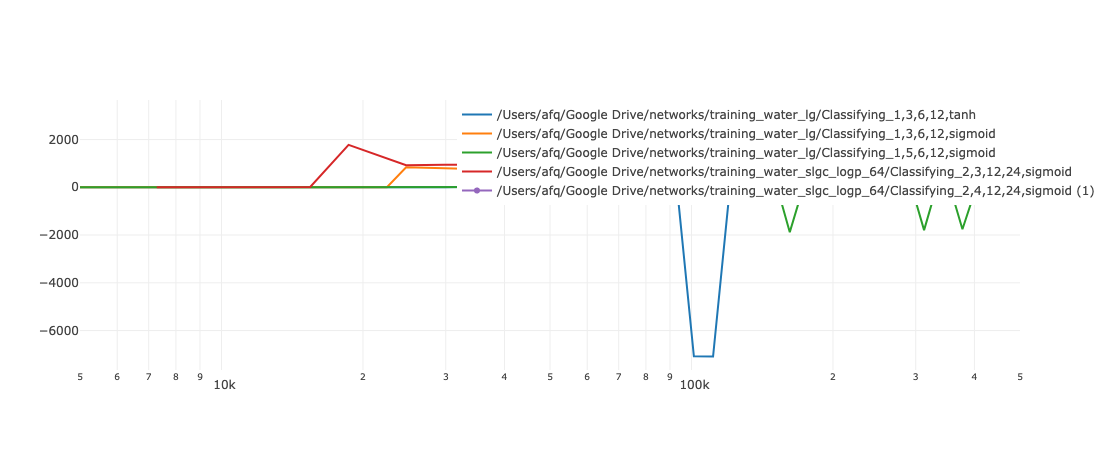

In [10]:
py.iplot(plot_contours(states))